In [1]:
import numpy as np
import os
import pandas as pd
from PIL import Image

In [9]:
dogs_path = 'C:/Users/Lenovo/Desktop/data_class/dog_photos1/'
cars_path = 'C:/Users/Lenovo/Desktop/data_class/car_photos1/'

cars = os.listdir(cars_path)
dogs = os.listdir(dogs_path)

In [10]:
train_size = 0.9

In [11]:
def img2vector(path, image_name):
    image = Image.open(os.path.join(path, image_name))
    vector = np.array(image)
    vector = vector.flatten()
    return vector

In [12]:
car_vectors = np.zeros((len(cars), 5625))
for i in range(0, len(cars)):
    car_vectors[i] = img2vector(cars_path, cars[i])

In [14]:
dogs_vectors = np.zeros((len(dogs), 5625))
for i in range(0, len(dogs)):
    dogs_vectors[i] = img2vector(dogs_path, dogs[i])

In [15]:
car = pd.DataFrame(car_vectors)
dogs_df = pd.DataFrame(dogs_vectors)

car['label'] = 1
dogs_df['label'] = -1

car_train = car.sample(frac=train_size, random_state=200)
car_test = car.drop(car_train.index)

dogs_train = dogs_df.sample(frac=train_size, random_state=200)
dogs_test = dogs_df.drop(dogs_train.index)

train_df = pd.concat([car_train, dogs_train])
test_df = pd.concat([car_test, dogs_test])

In [16]:
train_x = train_df.drop('label', axis=1)
train_y = train_df['label']

test_x = test_df.drop('label', axis=1)
test_y = test_df['label']

In [17]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

In [18]:
def knn(train_x, train_y, test_x, k):
    distances = []
    for i in range(0, len(train_x)):
        distance = euclidean_distance(train_x.iloc[i], test_x)
        distances.append((distance, train_y.iloc[i]))
    distances.sort()
    neighbors = []
    for i in range(0, k):
        neighbors.append(distances[i][1])
    return max(set(neighbors), key=neighbors.count)

def predict(train_x, train_y, test_x, k):
    predictions = []
    for i in range(0, len(test_x)):
        predictions.append(knn(train_x, train_y, test_x.iloc[i], k))
    return predictions

def accuracy(predictions, test_y):
    correct = 0
    for i in range(0, len(predictions)):
        if predictions[i] == test_y.iloc[i]:
            correct += 1
    return correct / len(predictions)


In [ ]:
predictions = predict(train_x, train_y, test_x, 3)

k:  1 accuracy:  0.85
k:  3 accuracy:  0.88
k:  5 accuracy:  0.9
k:  7 accuracy:  0.91
k:  9 accuracy:  0.9
k:  11 accuracy:  0.88
k:  13 accuracy:  0.88
k:  15 accuracy:  0.89
k:  17 accuracy:  0.89
k:  19 accuracy:  0.9
k:  21 accuracy:  0.87
k:  23 accuracy:  0.88
k:  25 accuracy:  0.89
k:  27 accuracy:  0.86
k:  29 accuracy:  0.85


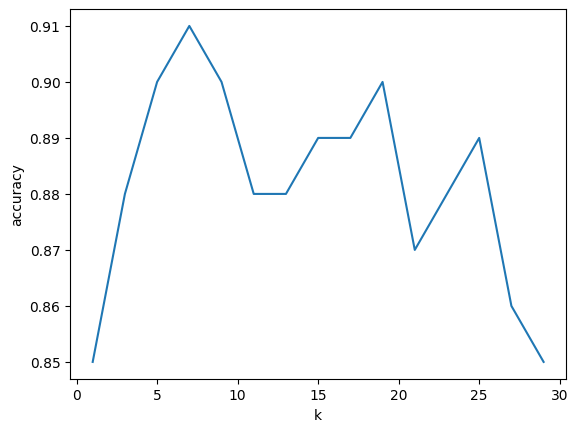

In [88]:
import matplotlib.pyplot as plt

k_list = []
accuracy_list = []

for k in range(1, 30,2):
    predictions = predict(train_x, train_y, test_x, k)
    accuracy_list.append(accuracy(predictions, test_y))
    k_list.append(k)
    print("k: ", k, "accuracy: ", accuracy(predictions, test_y))

plt.plot(k_list, accuracy_list)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()
